In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [4]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:>

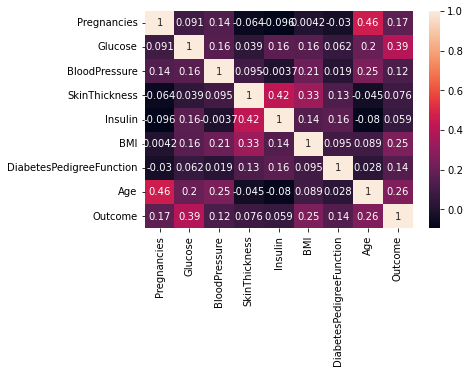

In [12]:
sns.heatmap(df.corr(method='kendall'),annot=True)

In [17]:
X = df.drop(columns=['Outcome'])
y = df['Outcome']

In [18]:
xtr,xts,ytr,yts = train_test_split(X,y,train_size=.7,random_state=123)

In [20]:
sc = StandardScaler()
sc_obj = sc.fit(xtr)

In [22]:
sctr,scts = sc_obj.transform(xtr),sc_obj.transform(xts)

In [29]:
clsfr = GaussianNB()
clsfr.fit(sctr,ytr)

GaussianNB()

In [34]:
y_prd_ts = clsfr.predict(scts)
y_prd_tr = clsfr.predict(sctr)

In [35]:
confusion_matrix(yts,y_prd_ts)

array([[124,  19],
       [ 32,  56]], dtype=int64)

In [36]:
accuracy_score(yts,y_prd_ts)

0.7792207792207793

In [38]:
accuracy_score(ytr,y_prd_tr)

0.7635009310986964